- sibsp	# of siblings / spouses aboard the Titanic
    - 兄弟または配偶者の数 -> 配偶者・兄弟のためにボートに乗らないとかある？
- parch	# of parents / children aboard the Titanic
    - その個人の年齢(20前後)で親の数なのか子供の数なのかをフラグ化する。親あり:0 子あり:1 
    - 単純に親または子がいるという家族として同じ運命をたどるかもしれないのでフラグ化。個人できている:0 家族と一緒に来ている:1

フラグになる変数いっぱい用意したらやっぱり**ランダムフォレスト**がうまく行くんでしょうか

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv('data/fillAge_byPclassMean.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00000,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00000,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.00000,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",0,25.14062,0,0,330877,8.4583,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00000,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00000,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00000,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00000,1,0,237736,30.0708,NaN,C,1,0,0


In [16]:
# 親または子がいるフラグ
havePorC = df.Parch.apply(lambda x: 0 if x == 0 else 1 )
havePorC = pd.DataFrame(havePorC).rename(columns={'Parch':'havePC'})
havePorC

,havePC
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


In [17]:
df2 = pd.concat((df,pd.DataFrame(havePorC)),axis=1)
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,havePC
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00000,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00000,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.1000,C123,S,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.00000,0,0,373450,8.0500,NaN,S,0,0,1,0
5,6,0,3,"Moran, Mr. James",0,25.14062,0,0,330877,8.4583,NaN,Q,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00000,0,0,17463,51.8625,E46,S,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00000,3,1,349909,21.0750,NaN,S,0,0,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00000,0,2,347742,11.1333,NaN,S,0,0,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00000,1,0,237736,30.0708,NaN,C,1,0,0,0


In [62]:
#親いるフラグ Age<20 かつ havePC == 1
zeros = np.zeros(len(df2))
haveP = pd.DataFrame(zeros,columns=['haveP'])
haveC = pd.DataFrame(zeros,columns=['haveC'])
df3 = pd.concat((df2,haveP,haveC),axis=1)


In [63]:
df3_haveP = df3[df3.Age <= 25][df3.havePC == 1]
df3_haveC = df3[df3.Age > 25][df3.havePC == 1]
df3_haveNot = df3[df3.havePC == 0]

/Users/zukako/.pyenv/versions/anaconda3-4.0.0/envs/chainer2_py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/zukako/.pyenv/versions/anaconda3-4.0.0/envs/chainer2_py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [68]:
df3_haveP.haveP = 1
df3_haveC.haveC = 1

In [69]:
df4 = pd.concat((df3_haveC,df3_haveP,df3_haveNot)).sort_values(by=['PassengerId'],ascending=True)

In [72]:
df4.haveP.astype(np.int32)
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,havePC,haveP,haveC
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00000,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00000,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.1000,C123,S,0,0,1,0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.00000,0,0,373450,8.0500,NaN,S,0,0,1,0,0.0,0.0
5,6,0,3,"Moran, Mr. James",0,25.14062,0,0,330877,8.4583,NaN,Q,0,1,0,0,0.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00000,0,0,17463,51.8625,E46,S,0,0,1,0,0.0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00000,3,1,349909,21.0750,NaN,S,0,0,1,1,1.0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00000,0,2,347742,11.1333,NaN,S,0,0,1,1,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00000,1,0,237736,30.0708,NaN,C,1,0,0,0,0.0,0.0


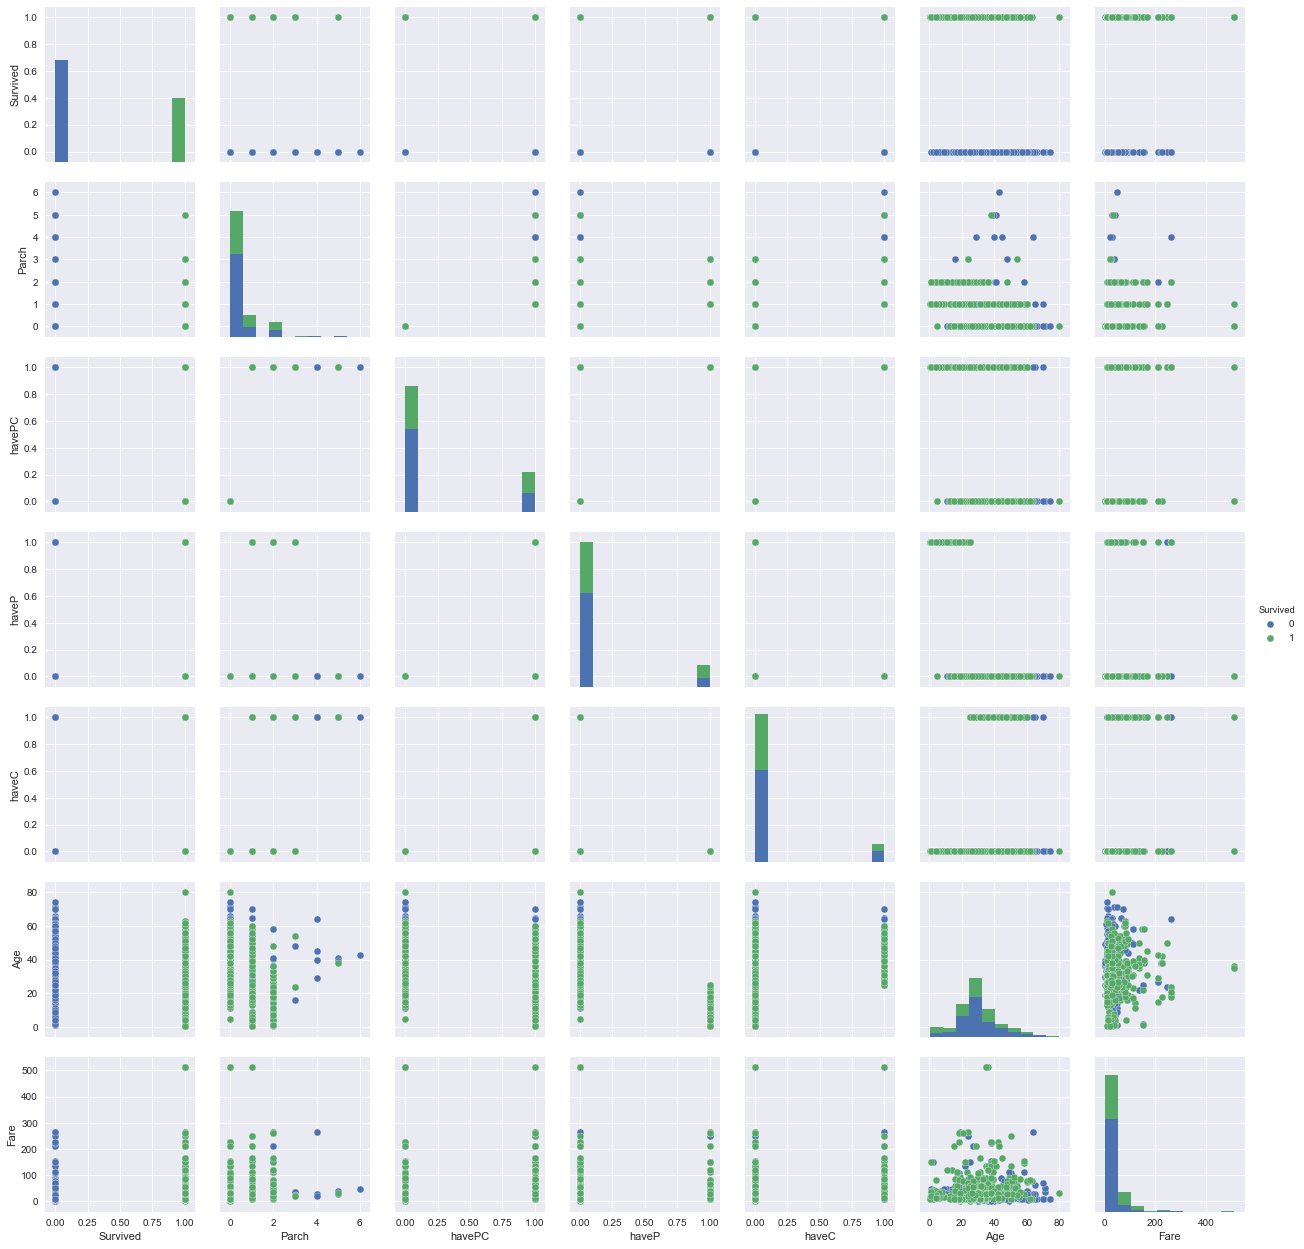

In [73]:
sns.pairplot(df4.loc[:,['Survived','Parch','havePC','haveP','haveC','Age','Fare']],hue='Survived')
plt.show()

In [74]:
df4.to_csv('data/withhavePC.csv',header=True,index=False)